In [15]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load 
County_MedianListingPrice_AllHomes = "County_MedianListingPrice_AllHomes.csv"
DaysOnZillow_County = "DaysOnZillow_County.csv"
Sale_Counts_County = "Sale_Counts_County.csv"



# Read the data
Price = pd.read_csv(County_MedianListingPrice_AllHomes, encoding="ISO-8859-1")
Days = pd.read_csv(DaysOnZillow_County, encoding="ISO-8859-1")
Sale = pd.read_csv(Sale_Counts_County, encoding="ISO-8859-1")



#Delete all empty rows and columns
Price = Price.dropna(how='all')
Days = Days.dropna(how='all')
Sale = Sale.dropna(how='all')



In [16]:
#Remove Columns that are not needed from each file
Sales = Sale.drop(labels=['RegionID','StateName','SizeRank','2008-03', '2008-04', '2008-05', '2008-06', '2008-07', 
                          '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01',
                          '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', 
                          '2009-08', '2009-09', '2009-10', '2009-11', '2009-12'], axis=1)

Prices = Price.drop(labels=['State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS','SizeRank'],axis=1) 
Days = Days.drop(labels=['SizeRank', 'RegionID', 'RegionType', 'StateName'],axis=1)

In [17]:
#Add extra column for each table
Days['Type']='Day'
Sales['Type']='Sale'
Prices['Type']='Price'

In [18]:
# Append the three files
PD = Prices.append(Days, ignore_index=True)
PDM = PD.append(Sales, ignore_index=True)
PDM.shape

(233, 115)

In [19]:
#rename the RegionName with the new column to county
PDM["County"] = PDM["RegionName"].map(str) + PDM["Type"]

In [20]:
#tanspose table
PDM.set_index(['County'],inplace=True)
PDM_ = PDM.transpose()
PDM_.head(1)

County,Mecklenburg CountyPrice,Wake CountyPrice,Guilford CountyPrice,Forsyth CountyPrice,Cumberland CountyPrice,Durham CountyPrice,Buncombe CountyPrice,Gaston CountyPrice,New Hanover CountyPrice,Union CountyPrice,...,Washington CountySale,Pamlico CountySale,Gates CountySale,Alleghany CountySale,Clay CountySale,Jones CountySale,Camden CountySale,Graham CountySale,Hyde CountySale,Tyrrell CountySale
2010-01,190000,248000,159900,154900,NaN,178440,260000,139900,260000,239900,...,6,6,3,13,10,4,1,5,0,1


In [21]:
#Convert to numeric
PDM_ = PDM_.convert_objects(convert_numeric=True)

In [22]:
### Find the order or location of each county
found=["Gaston" in column for column in PDM_.columns]
indexes=[i for i,x in enumerate(found) if x]
indexes

Subset_LA=PDM_.iloc[:,[0, 89, 146,1, 90, 147,5, 94, 151,10, 99, 155,7, 96, 153]]
Subset_LA.head(3)


County,Mecklenburg CountyPrice,Mecklenburg CountyDay,Mecklenburg CountySale,Wake CountyPrice,Wake CountyDay,Wake CountySale,Durham CountyPrice,Durham CountyDay,Durham CountySale,Cabarrus CountyPrice,Cabarrus CountyDay,Cabarrus CountySale,Gaston CountyPrice,Gaston CountyDay,Gaston CountySale
2010-01,190000.0,151.0,675.0,248000.0,185.0,657.0,178440.0,117.0,171.0,179900.0,147.0,107.0,139900.0,NaN,NaN
2010-02,194900.0,166.0,759.0,245000.0,169.0,713.0,179900.0,126.0,156.0,177700.0,162.5,135.0,139000.0,NaN,NaN
2010-03,192000.0,151.0,1112.0,239900.0,156.0,1108.0,185000.0,152.0,270.0,175000.0,144.0,173.0,138900.0,133.0,NaN


In [23]:
Subset_LA.columns

Index(['Mecklenburg CountyPrice', 'Mecklenburg CountyDay',
       'Mecklenburg CountySale', 'Wake CountyPrice', 'Wake CountyDay',
       'Wake CountySale', 'Durham CountyPrice', 'Durham CountyDay',
       'Durham CountySale', 'Cabarrus CountyPrice', 'Cabarrus CountyDay',
       'Cabarrus CountySale', 'Gaston CountyPrice', 'Gaston CountyDay',
       'Gaston CountySale'],
      dtype='object', name='County')

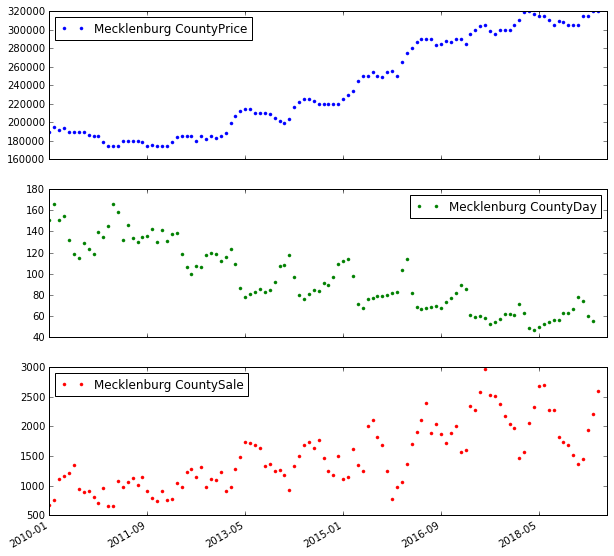

In [24]:
cols_plot = ['Mecklenburg CountyPrice', 'Mecklenburg CountyDay',
       'Mecklenburg CountySale']
axes = Subset_LA[cols_plot].plot(marker='.', alpha=1, linestyle='None', figsize=(10, 10), subplots=True)
plt.savefig('Mecklenburg_M.png')


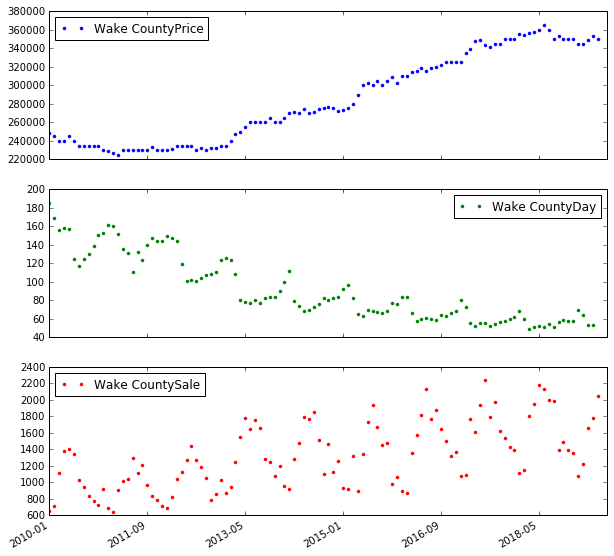

In [25]:
cols_plot = ['Wake CountyPrice', 'Wake CountyDay',
       'Wake CountySale']
axes = Subset_LA[cols_plot].plot(marker='.', alpha=1, linestyle='None', figsize=(10, 10), subplots=True)
plt.savefig('Wake_M.png')

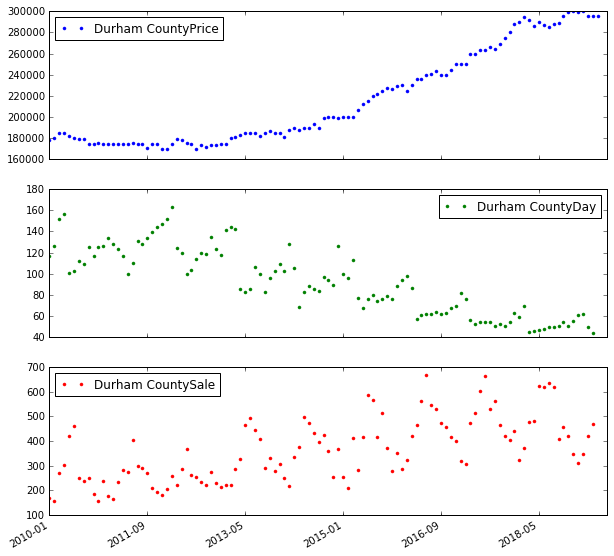

In [26]:
cols_plot = ['Durham CountyPrice', 'Durham CountyDay',
       'Durham CountySale']
axes = Subset_LA[cols_plot].plot(marker='.', alpha=1, linestyle='None', figsize=(10, 10), subplots=True)
plt.savefig('Durham_M.png')

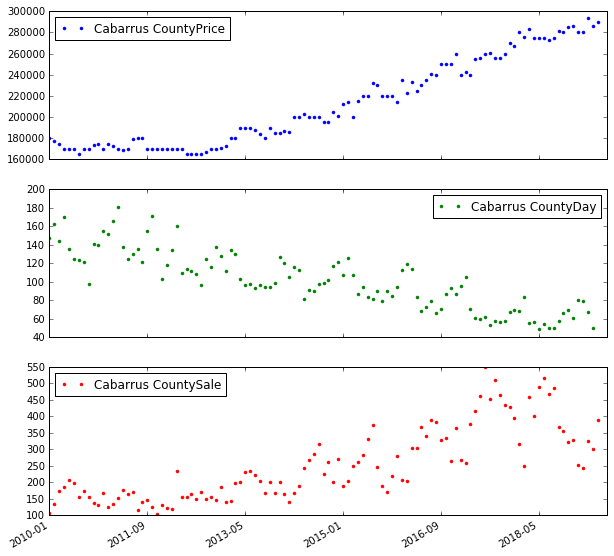

In [27]:
cols_plot = ['Cabarrus CountyPrice', 'Cabarrus CountyDay',
       'Cabarrus CountySale']
axes = Subset_LA[cols_plot].plot(marker='.', alpha=1, linestyle='None', figsize=(10, 10), subplots=True)
plt.savefig('Cabarrus_M.png')

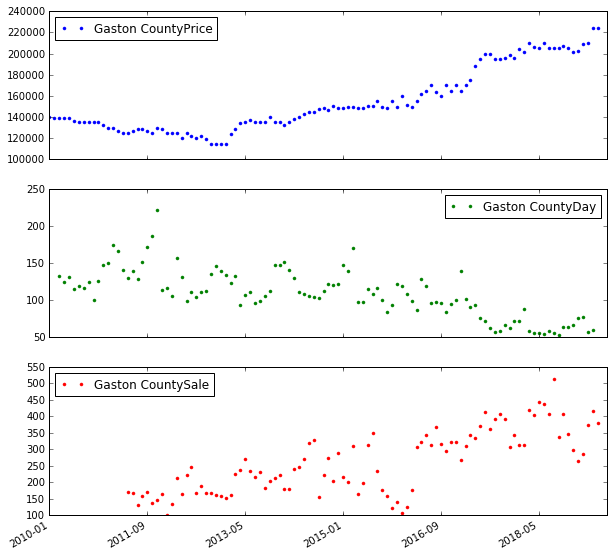

In [28]:
cols_plot = ['Gaston CountyPrice', 'Gaston CountyDay',
       'Gaston CountySale']
axes = Subset_LA[cols_plot].plot(marker='.', alpha=1, linestyle='None', figsize=(10, 10), subplots=True)
plt.savefig('Gaston_M.png')

In [29]:
export_excel = Subset_LA.to_excel (r'C:\Users\badrem02\Desktop\BootCamp\proj1\Subset_.xlsx', header=True) 


In [30]:
#correlation Coefficient
Subset_LA.corr()
plt.savefig('Correlation_M.png')

In [33]:
Subset = pd.read_csv('Subset.csv', encoding="ISO-8859-1")

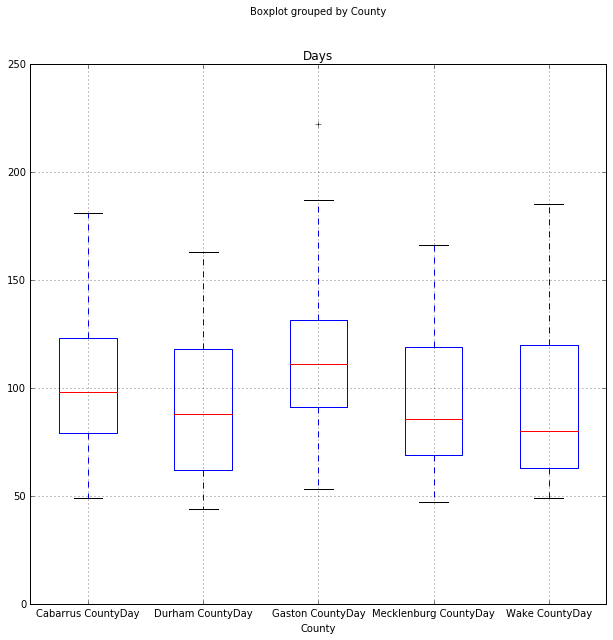

In [34]:
Subset.boxplot(column='Days', by='County', figsize=(10, 10))
plt.savefig('Boxplot_Days_M.png')

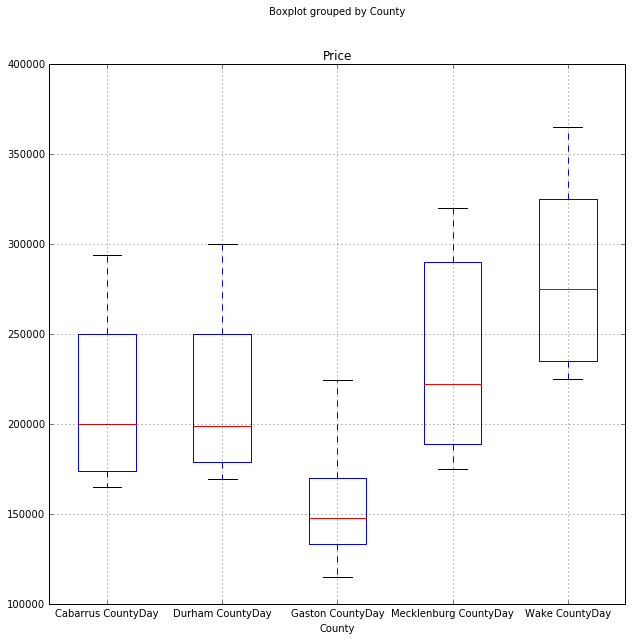

In [35]:
Subset.boxplot(column='Price', by='County', figsize=(10, 10))
plt.savefig('Price_M.png')

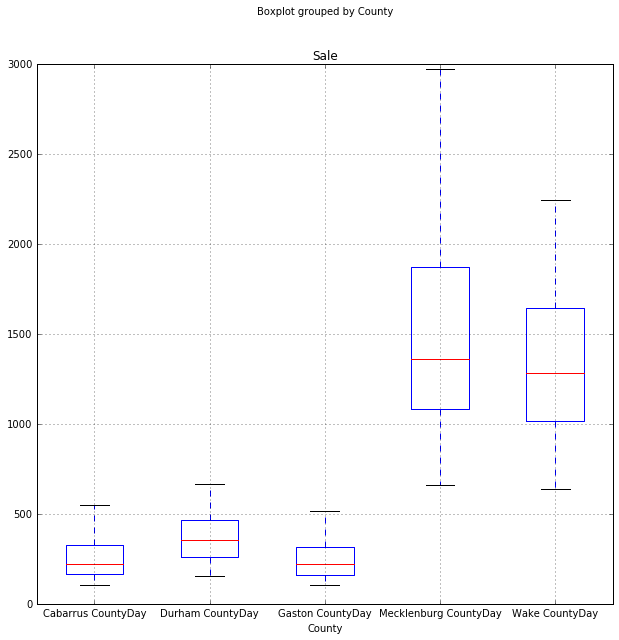

In [36]:
Subset.boxplot(column='Sale', by='County', figsize=(10, 10))
plt.savefig('Sale_M.png')